In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [2]:
def train_model(file_name):
    #load excel file
    xls =  pd.ExcelFile(file_name)

    #Read data from each sheet
    swe_df = pd.read_excel(xls, 'SWE(in)')
    temp_df= pd.read_excel(xls, 'Airtemp(degF)')
    precip_df= pd.read_excel(xls, 'Ppt(in)')

    #Concatenate dataframes across columns for features (X)
    X= pd.concat([temp_df, precip_df], axis=1)

    #Use the entire SWE sheet as the target variable (y)
    y=swe_df

    #Handle missing values in X with mean imputation
    imputer_X = SimpleImputer(strategy= 'mean')
    X_imputed = imputer_X.fit_transform(X)

    #Handle missing values in y with mean imputation
    imputer_y = SimpleImputer(strategy='mean')
    y_imputed =  imputer_y.fit_transform(y)

    #Ensure x and y have same number of samples
    min_samples = min(len(X_imputed), len(y_imputed))
    X_imputed = X_imputed[:min_samples]
    y_imputed = y_imputed[:min_samples]

    return X_imputed, y_imputed

In [4]:
#Aggregate predictions and actual values across all datasets

all_X_test = []
all_y_test = []

for file_name in ["Sierra Blanca (1034)_SWE.xlsx", "Garita Peak 1173.xlsx", "Red river pass.xlsx", "Quemazon.xlsx"]:
    X_test, y_test = train_model(file_name)
    all_X_test.extend(X_test)
    all_y_test.extend(y_test)


In [5]:
#Split aggregated data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(all_X_test, all_y_test, test_size=0.2, random_state=42)

In [15]:
#Train the model
model= LinearRegression()
model.fit(X_train, y_train)

#Predict on test set
y_pred = model.predict(X_test)

In [16]:
#Ensure y_test and y_pred are 1-dimensional arrays
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)


#Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squaerd error for all files: {mse}")


Mean squaerd error for all files: 2.799160172956734


<Axes: xlabel='Actual SWE', ylabel='Predicted SWE'>

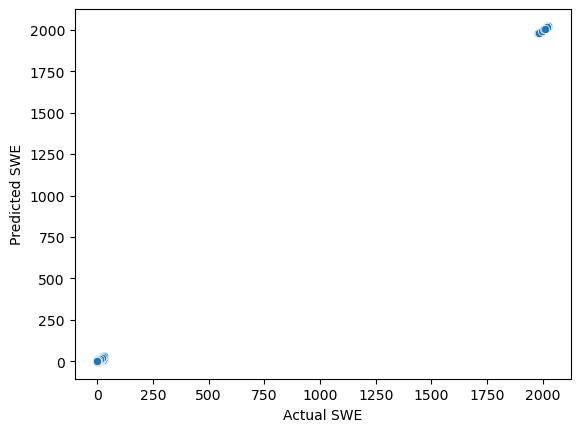

In [17]:
plot_data = pd.DataFrame({'Actual SWE': y_test, 'Predicted SWE': y_pred})
sns.scatterplot(data=plot_data,x='Actual SWE', y='Predicted SWE')